In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
# matplotlib 한글화

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [135]:
import warnings
warnings.filterwarnings(action='ignore') 

In [136]:
df = pd.read_csv('./ml_source_files/heart_failure_clinical_records_dataset.csv')

In [137]:
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [170]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [139]:
from sklearn.model_selection import train_test_split

In [140]:
y = df.DEATH_EVENT
x = df.drop(['DEATH_EVENT'], axis=1)

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=111)

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.ensemble import VotingClassifier

In [143]:
from sklearn.metrics import classification_report

In [144]:
tree = DecisionTreeClassifier()
log = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()
svc = SVC(probability=True)

vot_h = VotingClassifier(estimators = [('log', log), ('tree', tree), ('knn', knn), ('nb', nb),\
                                     ('svc', svc)], voting='hard')
vot_s = VotingClassifier(estimators = [('log', log), ('tree', tree), ('knn', knn), ('nb', nb),\
                                     ('svc', svc)], voting='soft')

In [145]:
models = [tree, log, knn, nb, svc, vot_h, vot_s]

In [146]:
for m in models:
    m.fit(x_train, y_train)
    preds = m.predict(x_test)
    accuracy = m.score(x_test, y_test)
    
    print(m.__class__.__name__, ':', accuracy)
#     print(classification_report(y_test, preds))
    print('=' * 50)

DecisionTreeClassifier : 0.7866666666666666
LogisticRegression : 0.8666666666666667
KNeighborsClassifier : 0.6133333333333333
GaussianNB : 0.8266666666666667
SVC : 0.6533333333333333
VotingClassifier : 0.8266666666666667
VotingClassifier : 0.8266666666666667


In [147]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [148]:
xgb = XGBClassifier(n_estimators=500, random_state=111)
xgb.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='auc',
           eval_set=[(x_train, y_train), (x_test, y_test)])
xgb.score(x_test,y_test)

[0]	validation_0-auc:0.95566	validation_1-auc:0.91013
[1]	validation_0-auc:0.95867	validation_1-auc:0.90228
[2]	validation_0-auc:0.96266	validation_1-auc:0.90385
[3]	validation_0-auc:0.97106	validation_1-auc:0.90934
[4]	validation_0-auc:0.98307	validation_1-auc:0.92268
[5]	validation_0-auc:0.99026	validation_1-auc:0.93681
[6]	validation_0-auc:0.99323	validation_1-auc:0.93681
[7]	validation_0-auc:0.99647	validation_1-auc:0.93681
[8]	validation_0-auc:0.99750	validation_1-auc:0.93721
[9]	validation_0-auc:0.99768	validation_1-auc:0.93407
[10]	validation_0-auc:0.99898	validation_1-auc:0.93014
[11]	validation_0-auc:0.99963	validation_1-auc:0.93642
[12]	validation_0-auc:0.99991	validation_1-auc:0.93642
[13]	validation_0-auc:0.99991	validation_1-auc:0.93485
[14]	validation_0-auc:1.00000	validation_1-auc:0.93171
[15]	validation_0-auc:1.00000	validation_1-auc:0.92622
[16]	validation_0-auc:1.00000	validation_1-auc:0.92857
[17]	validation_0-auc:1.00000	validation_1-auc:0.92936
[18]	validation_0-au

[149]	validation_0-auc:1.00000	validation_1-auc:0.93642
[150]	validation_0-auc:1.00000	validation_1-auc:0.93642
[151]	validation_0-auc:1.00000	validation_1-auc:0.93721
[152]	validation_0-auc:1.00000	validation_1-auc:0.93642
[153]	validation_0-auc:1.00000	validation_1-auc:0.93721
[154]	validation_0-auc:1.00000	validation_1-auc:0.93642
[155]	validation_0-auc:1.00000	validation_1-auc:0.93642
[156]	validation_0-auc:1.00000	validation_1-auc:0.93721
[157]	validation_0-auc:1.00000	validation_1-auc:0.93642
[158]	validation_0-auc:1.00000	validation_1-auc:0.93564
[159]	validation_0-auc:1.00000	validation_1-auc:0.93721
[160]	validation_0-auc:1.00000	validation_1-auc:0.93642
[161]	validation_0-auc:1.00000	validation_1-auc:0.93721
[162]	validation_0-auc:1.00000	validation_1-auc:0.93642
[163]	validation_0-auc:1.00000	validation_1-auc:0.93642
[164]	validation_0-auc:1.00000	validation_1-auc:0.93721
[165]	validation_0-auc:1.00000	validation_1-auc:0.93721
[166]	validation_0-auc:1.00000	validation_1-auc:

0.9066666666666666

In [149]:
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)
lgbm.score(x_test,y_test)

0.88

In [150]:
catboost = CatBoostClassifier()
catboost.fit(x_train, y_train)
catboost.score(x_test, y_test)

Learning rate set to 0.005439
0:	learn: 0.6893693	total: 1.5ms	remaining: 1.5s
1:	learn: 0.6856575	total: 2.67ms	remaining: 1.33s
2:	learn: 0.6820013	total: 4.36ms	remaining: 1.45s
3:	learn: 0.6779679	total: 5.83ms	remaining: 1.45s
4:	learn: 0.6729500	total: 7.26ms	remaining: 1.45s
5:	learn: 0.6685222	total: 8.7ms	remaining: 1.44s
6:	learn: 0.6650963	total: 10.2ms	remaining: 1.44s
7:	learn: 0.6614136	total: 11.7ms	remaining: 1.44s
8:	learn: 0.6578700	total: 13ms	remaining: 1.43s
9:	learn: 0.6532044	total: 14.4ms	remaining: 1.43s
10:	learn: 0.6502316	total: 15.8ms	remaining: 1.42s
11:	learn: 0.6465393	total: 17.2ms	remaining: 1.41s
12:	learn: 0.6430550	total: 18.6ms	remaining: 1.41s
13:	learn: 0.6394350	total: 19.8ms	remaining: 1.4s
14:	learn: 0.6359121	total: 21ms	remaining: 1.38s
15:	learn: 0.6322684	total: 22.2ms	remaining: 1.36s
16:	learn: 0.6277225	total: 23.2ms	remaining: 1.34s
17:	learn: 0.6243827	total: 24.3ms	remaining: 1.32s
18:	learn: 0.6209049	total: 25.3ms	remaining: 1.31s


218:	learn: 0.3002033	total: 167ms	remaining: 597ms
219:	learn: 0.2997714	total: 168ms	remaining: 596ms
220:	learn: 0.2988995	total: 169ms	remaining: 595ms
221:	learn: 0.2983327	total: 170ms	remaining: 594ms
222:	learn: 0.2973773	total: 170ms	remaining: 594ms
223:	learn: 0.2968629	total: 171ms	remaining: 593ms
224:	learn: 0.2962189	total: 172ms	remaining: 592ms
225:	learn: 0.2952667	total: 172ms	remaining: 591ms
226:	learn: 0.2946459	total: 173ms	remaining: 590ms
227:	learn: 0.2937334	total: 174ms	remaining: 589ms
228:	learn: 0.2930624	total: 174ms	remaining: 587ms
229:	learn: 0.2924978	total: 175ms	remaining: 586ms
230:	learn: 0.2917881	total: 176ms	remaining: 586ms
231:	learn: 0.2909780	total: 177ms	remaining: 585ms
232:	learn: 0.2903456	total: 177ms	remaining: 583ms
233:	learn: 0.2896732	total: 178ms	remaining: 583ms
234:	learn: 0.2888702	total: 179ms	remaining: 582ms
235:	learn: 0.2883352	total: 179ms	remaining: 581ms
236:	learn: 0.2875250	total: 180ms	remaining: 580ms
237:	learn: 

498:	learn: 0.1760344	total: 339ms	remaining: 340ms
499:	learn: 0.1757321	total: 340ms	remaining: 340ms
500:	learn: 0.1755098	total: 340ms	remaining: 339ms
501:	learn: 0.1753095	total: 341ms	remaining: 338ms
502:	learn: 0.1750123	total: 342ms	remaining: 337ms
503:	learn: 0.1747276	total: 342ms	remaining: 337ms
504:	learn: 0.1745072	total: 343ms	remaining: 336ms
505:	learn: 0.1741504	total: 343ms	remaining: 335ms
506:	learn: 0.1738856	total: 344ms	remaining: 335ms
507:	learn: 0.1734125	total: 345ms	remaining: 334ms
508:	learn: 0.1731750	total: 345ms	remaining: 333ms
509:	learn: 0.1728188	total: 346ms	remaining: 332ms
510:	learn: 0.1725355	total: 347ms	remaining: 332ms
511:	learn: 0.1721084	total: 347ms	remaining: 331ms
512:	learn: 0.1718103	total: 348ms	remaining: 330ms
513:	learn: 0.1715114	total: 349ms	remaining: 330ms
514:	learn: 0.1712755	total: 349ms	remaining: 329ms
515:	learn: 0.1708894	total: 350ms	remaining: 328ms
516:	learn: 0.1706778	total: 351ms	remaining: 327ms
517:	learn: 

782:	learn: 0.1170131	total: 510ms	remaining: 141ms
783:	learn: 0.1168806	total: 511ms	remaining: 141ms
784:	learn: 0.1167120	total: 511ms	remaining: 140ms
785:	learn: 0.1165669	total: 512ms	remaining: 139ms
786:	learn: 0.1164128	total: 513ms	remaining: 139ms
787:	learn: 0.1162553	total: 513ms	remaining: 138ms
788:	learn: 0.1161147	total: 514ms	remaining: 137ms
789:	learn: 0.1160521	total: 514ms	remaining: 137ms
790:	learn: 0.1159788	total: 515ms	remaining: 136ms
791:	learn: 0.1158929	total: 516ms	remaining: 135ms
792:	learn: 0.1157923	total: 516ms	remaining: 135ms
793:	learn: 0.1155993	total: 517ms	remaining: 134ms
794:	learn: 0.1154399	total: 517ms	remaining: 133ms
795:	learn: 0.1152889	total: 518ms	remaining: 133ms
796:	learn: 0.1151360	total: 519ms	remaining: 132ms
797:	learn: 0.1149639	total: 519ms	remaining: 131ms
798:	learn: 0.1148241	total: 520ms	remaining: 131ms
799:	learn: 0.1146888	total: 520ms	remaining: 130ms
800:	learn: 0.1145937	total: 521ms	remaining: 129ms
801:	learn: 

0.9066666666666666

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
rtc = RandomForestClassifier()
rtc.fit(x_train, y_train)
rtc.score(x_test, y_test)

0.8933333333333333

In [111]:
# scaling

In [112]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [153]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [154]:
tree = DecisionTreeClassifier()
log = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()
svc = SVC(probability=True)

vot_h = VotingClassifier(estimators = [('log', log), ('tree', tree), ('knn', knn), ('nb', nb),\
                                     ('svc', svc)], voting='hard')
vot_s = VotingClassifier(estimators = [('log', log), ('tree', tree), ('knn', knn), ('nb', nb),\
                                     ('svc', svc)], voting='soft')

In [155]:
for m in models:
    m.fit(x_train_scaled, y_train)
    preds = m.predict(x_test_scaled)
    accuracy = m.score(x_test_scaled, y_test)
    
    print(m.__class__.__name__, ':', accuracy)
#     print(classification_report(y_test, preds))
    print('=' * 50)

DecisionTreeClassifier : 0.7866666666666666
LogisticRegression : 0.8933333333333333
KNeighborsClassifier : 0.7466666666666667
GaussianNB : 0.76
SVC : 0.84
VotingClassifier : 0.8266666666666667
VotingClassifier : 0.84


In [156]:
xgb = XGBClassifier(n_estimators=500, random_state=111)
xgb.fit(x_train_scaled, y_train, early_stopping_rounds=100, eval_metric='auc',
           eval_set=[(x_train_scaled, y_train), (x_test_scaled, y_test)])
xgb.score(x_test_scaled,y_test)

[0]	validation_0-auc:0.95566	validation_1-auc:0.91013
[1]	validation_0-auc:0.95867	validation_1-auc:0.90228
[2]	validation_0-auc:0.96266	validation_1-auc:0.90385
[3]	validation_0-auc:0.97106	validation_1-auc:0.90934
[4]	validation_0-auc:0.98307	validation_1-auc:0.92347
[5]	validation_0-auc:0.99026	validation_1-auc:0.93210
[6]	validation_0-auc:0.99323	validation_1-auc:0.93681
[7]	validation_0-auc:0.99647	validation_1-auc:0.93367
[8]	validation_0-auc:0.99750	validation_1-auc:0.93564
[9]	validation_0-auc:0.99768	validation_1-auc:0.93485
[10]	validation_0-auc:0.99898	validation_1-auc:0.93093
[11]	validation_0-auc:0.99963	validation_1-auc:0.93564
[12]	validation_0-auc:0.99991	validation_1-auc:0.93721
[13]	validation_0-auc:0.99991	validation_1-auc:0.93642
[14]	validation_0-auc:1.00000	validation_1-auc:0.93328
[15]	validation_0-auc:1.00000	validation_1-auc:0.92700
[16]	validation_0-auc:1.00000	validation_1-auc:0.92857
[17]	validation_0-auc:1.00000	validation_1-auc:0.92936
[18]	validation_0-au

0.8666666666666667

In [157]:
lgbm = LGBMClassifier()
lgbm.fit(x_train_scaled, y_train)
lgbm.score(x_test_scaled,y_test)

0.88

In [158]:
catboost = CatBoostClassifier()
catboost.fit(x_train_scaled, y_train)
catboost.score(x_test_scaled, y_test)

Learning rate set to 0.005439
0:	learn: 0.6893693	total: 4.22ms	remaining: 4.21s
1:	learn: 0.6856575	total: 7.3ms	remaining: 3.64s
2:	learn: 0.6820013	total: 11.2ms	remaining: 3.72s
3:	learn: 0.6779679	total: 15.2ms	remaining: 3.78s
4:	learn: 0.6729500	total: 19.3ms	remaining: 3.84s
5:	learn: 0.6685222	total: 23.3ms	remaining: 3.86s
6:	learn: 0.6650963	total: 27.4ms	remaining: 3.88s
7:	learn: 0.6614136	total: 31.3ms	remaining: 3.88s
8:	learn: 0.6578700	total: 35.3ms	remaining: 3.88s
9:	learn: 0.6532044	total: 39.4ms	remaining: 3.9s
10:	learn: 0.6502316	total: 43.3ms	remaining: 3.9s
11:	learn: 0.6465393	total: 47.4ms	remaining: 3.9s
12:	learn: 0.6430550	total: 51.4ms	remaining: 3.9s
13:	learn: 0.6394350	total: 55.6ms	remaining: 3.91s
14:	learn: 0.6359121	total: 59.7ms	remaining: 3.92s
15:	learn: 0.6322684	total: 63.8ms	remaining: 3.92s
16:	learn: 0.6277225	total: 67.9ms	remaining: 3.93s
17:	learn: 0.6243827	total: 70.8ms	remaining: 3.86s
18:	learn: 0.6209049	total: 73.7ms	remaining: 3.8

429:	learn: 0.1973019	total: 338ms	remaining: 449ms
430:	learn: 0.1969738	total: 339ms	remaining: 448ms
431:	learn: 0.1965290	total: 340ms	remaining: 447ms
432:	learn: 0.1961316	total: 340ms	remaining: 446ms
433:	learn: 0.1958318	total: 341ms	remaining: 445ms
434:	learn: 0.1954991	total: 342ms	remaining: 444ms
435:	learn: 0.1950585	total: 342ms	remaining: 443ms
436:	learn: 0.1947737	total: 343ms	remaining: 442ms
437:	learn: 0.1945109	total: 344ms	remaining: 441ms
438:	learn: 0.1942944	total: 344ms	remaining: 440ms
439:	learn: 0.1939940	total: 345ms	remaining: 439ms
440:	learn: 0.1936493	total: 345ms	remaining: 438ms
441:	learn: 0.1933487	total: 346ms	remaining: 437ms
442:	learn: 0.1931098	total: 347ms	remaining: 436ms
443:	learn: 0.1928701	total: 347ms	remaining: 435ms
444:	learn: 0.1925834	total: 348ms	remaining: 434ms
445:	learn: 0.1923551	total: 353ms	remaining: 439ms
446:	learn: 0.1920106	total: 354ms	remaining: 438ms
447:	learn: 0.1916919	total: 355ms	remaining: 437ms
448:	learn: 

709:	learn: 0.1292255	total: 511ms	remaining: 209ms
710:	learn: 0.1291247	total: 512ms	remaining: 208ms
711:	learn: 0.1289187	total: 512ms	remaining: 207ms
712:	learn: 0.1287119	total: 513ms	remaining: 206ms
713:	learn: 0.1284452	total: 514ms	remaining: 206ms
714:	learn: 0.1282889	total: 514ms	remaining: 205ms
715:	learn: 0.1281995	total: 515ms	remaining: 204ms
716:	learn: 0.1280305	total: 515ms	remaining: 203ms
717:	learn: 0.1278741	total: 516ms	remaining: 203ms
718:	learn: 0.1277253	total: 517ms	remaining: 202ms
719:	learn: 0.1275370	total: 517ms	remaining: 201ms
720:	learn: 0.1273593	total: 518ms	remaining: 200ms
721:	learn: 0.1271617	total: 518ms	remaining: 200ms
722:	learn: 0.1269984	total: 519ms	remaining: 199ms
723:	learn: 0.1267831	total: 520ms	remaining: 198ms
724:	learn: 0.1266376	total: 521ms	remaining: 197ms
725:	learn: 0.1264479	total: 521ms	remaining: 197ms
726:	learn: 0.1263713	total: 522ms	remaining: 196ms
727:	learn: 0.1261775	total: 523ms	remaining: 195ms
728:	learn: 

999:	learn: 0.0883558	total: 683ms	remaining: 0us


0.9066666666666666

In [159]:
rtc = RandomForestClassifier()
rtc.fit(x_train_scaled, y_train)
rtc.score(x_test_scaled, y_test)

0.88

In [120]:
# LogisticRegression

In [121]:
log = LogisticRegression()
log.fit(x_train_scaled, y_train)
log.score(x_test_scaled, y_test)

0.7333333333333333

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
params = {'C' : list(np.arange(0.01, 1, 0.05)) + list(range(1, 100, 5))}

In [124]:
grid = GridSearchCV(log, param_grid=params, verbose=False, cv=5)
grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.060000000000000005, 0.11,
                               0.16000000000000003, 0.21000000000000002, 0.26,
                               0.31000000000000005, 0.36000000000000004,
                               0.41000000000000003, 0.46, 0.51, 0.56,
                               0.6100000000000001, 0.66, 0.7100000000000001,
                               0.76, 0.81, 0.8600000000000001, 0.91,
                               0.9600000000000001, 1, 6, 11, 16, 21, 26, 31, 36,
                               41, 46, ...]},
             verbose=False)

In [160]:
grid.best_params_

{'n_neighbors': 8}

In [161]:
grid.best_score_

0.7185858585858587

In [162]:
log = LogisticRegression()
log.fit(x_train_scaled, y_train)
log.score(x_test_scaled, y_test)

0.8933333333333333

In [163]:
params = {'n_neighbors': list(range(2, 50))}

In [164]:
grid = GridSearchCV(knn, param_grid=params, verbose=False, cv=5)
grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, ...]},
             verbose=False)

In [165]:
grid.best_params_

{'n_neighbors': 29}

In [166]:
grid.best_score_

0.7321212121212122

In [167]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(x_train_scaled, y_train)
knn.score(x_test_scaled, y_test)

0.72

In [ ]:
nb = GaussianNB()

<AxesSubplot:xlabel='age', ylabel='DEATH_EVENT'>

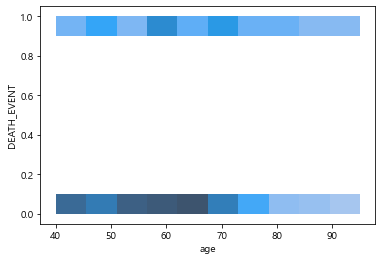

In [172]:
sns.histplot(x='age', y='DEATH_EVENT', data=df, kde=True)

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

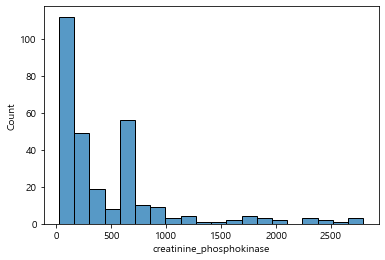

In [177]:
sns.histplot(data=df.loc[df['creatinine_phosphokinase']<3000, 'creatinine_phosphokinase'])

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

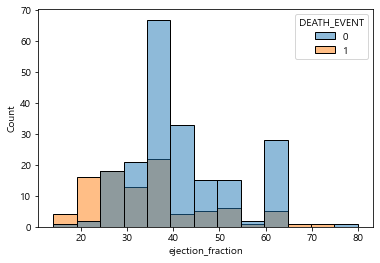

In [175]:
sns.histplot(x='ejection_fraction', data = df, bins=13, hue='DEATH_EVENT')

<AxesSubplot:xlabel='platelets', ylabel='Count'>

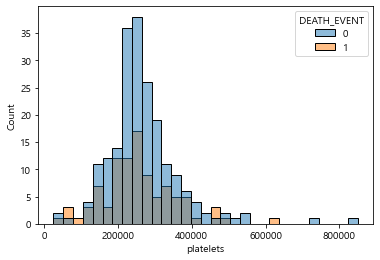

In [178]:
sns.histplot(x='platelets', data=df, hue='DEATH_EVENT')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

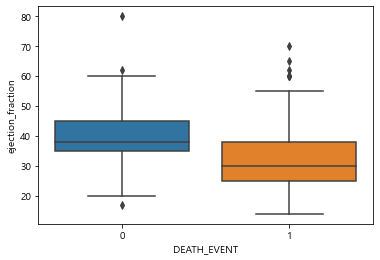

In [179]:
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='smoking'>

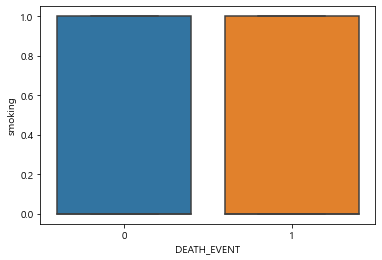

In [180]:
sns.boxplot(x='DEATH_EVENT', y='smoking', data=df)

In [ ]:
# 강사님

In [181]:
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [182]:
y = df.DEATH_EVENT
x = df.drop('DEATH_EVENT', axis=1)

In [183]:
x.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
dtype: object

In [184]:
x.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [186]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=111)

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report, f1_score, roc_auc_score

In [188]:
log = LogisticRegression()
rfc = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

In [189]:
models = [log, rfc, xgb, lgbm]

In [192]:
trained_models = []

for m in models:
    m.fit(x_train, y_train)
    preds = m.predict(x_test)
    proba = m.predict_proba(x_test)[:,1]
    
    print('=' * 50)
    print(m.__class__.__name__)
    print('classification_report :', classification_report(y_test, preds))
    print('roc_auc_score :', roc_auc_score(y_test, proba))

LogisticRegression
classification_report :               precision    recall  f1-score   support

           0       0.85      0.95      0.90        37
           1       0.89      0.74      0.81        23

    accuracy                           0.87        60
   macro avg       0.87      0.84      0.85        60
weighted avg       0.87      0.87      0.86        60

roc_auc_score : 0.9224441833137486
RandomForestClassifier
classification_report :               precision    recall  f1-score   support

           0       0.88      0.97      0.92        37
           1       0.95      0.78      0.86        23

    accuracy                           0.90        60
   macro avg       0.91      0.88      0.89        60
weighted avg       0.90      0.90      0.90        60

roc_auc_score : 0.9471210340775558
[11:12:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'bi

In [193]:
# scaling

In [194]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [195]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [196]:
trained_models = []

for m in models:
    m.fit(x_train_scaled, y_train)
    preds = m.predict(x_test_scaled)
    proba = m.predict_proba(x_test_scaled)[:,1]
    
    print('=' * 50)
    print(m.__class__.__name__)
    print('classification_report :', classification_report(y_test, preds))
    print('roc_auc_score :', roc_auc_score(y_test, proba))
    

LogisticRegression
classification_report :               precision    recall  f1-score   support

           0       0.88      0.97      0.92        37
           1       0.95      0.78      0.86        23

    accuracy                           0.90        60
   macro avg       0.91      0.88      0.89        60
weighted avg       0.90      0.90      0.90        60

roc_auc_score : 0.9212690951821386
RandomForestClassifier
classification_report :               precision    recall  f1-score   support

           0       0.90      0.97      0.94        37
           1       0.95      0.83      0.88        23

    accuracy                           0.92        60
   macro avg       0.93      0.90      0.91        60
weighted avg       0.92      0.92      0.92        60

roc_auc_score : 0.9471210340775558
[11:16:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'bi

In [197]:
# 왜도 (Skewness)
# - 왼쪽으로 치우침 = 왜도 > 0
# - 오른쪽으로 치우침 = 왜도 < 0
from scipy.stats import skew

In [204]:
pd.DataFrame(x_train_scaled).apply(lambda x: skew(x))

0     0.386651
1     0.330794
2     4.539891
3     0.401138
4     0.509496
5     0.641537
6     1.390487
7     4.526926
8    -0.973112
9    -0.661005
10    0.781661
11    0.122671
dtype: float64

In [205]:
# 왜도가 큰 데이터만 log처리
x_train_scaled[:,2] = np.log1p(x_train_scaled[:,2])
x_train_scaled[:,7] = np.log1p(x_train_scaled[:,7])

In [206]:
pd.DataFrame(x_train_scaled).apply(lambda x: skew(x))

0     0.386651
1     0.330794
2     1.591418
3     0.401138
4     0.509496
5     0.641537
6     1.390487
7     1.018023
8    -0.973112
9    -0.661005
10    0.781661
11    0.122671
dtype: float64

In [207]:
trained_models = []

for m in models:
    m.fit(x_train_scaled, y_train)
    preds = m.predict(x_test_scaled)
    proba = m.predict_proba(x_test_scaled)[:,1]
    
    print('=' * 50)
    print(m.__class__.__name__)
    print('classification_report :', classification_report(y_test, preds))
    print('roc_auc_score :', roc_auc_score(y_test, proba))
    

LogisticRegression
classification_report :               precision    recall  f1-score   support

           0       0.88      0.95      0.91        37
           1       0.90      0.78      0.84        23

    accuracy                           0.88        60
   macro avg       0.89      0.86      0.87        60
weighted avg       0.88      0.88      0.88        60

roc_auc_score : 0.917743830787309
RandomForestClassifier
classification_report :               precision    recall  f1-score   support

           0       0.90      0.95      0.92        37
           1       0.90      0.83      0.86        23

    accuracy                           0.90        60
   macro avg       0.90      0.89      0.89        60
weighted avg       0.90      0.90      0.90        60

roc_auc_score : 0.9529964747356052
[11:45:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'bin